In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Major Project/

/content/drive/MyDrive/Major Project


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns



In [ ]:
total_custom_test = 48
svm_correct = 0
svm_incorrect = 0
knn_correct = 0
knn_incorrect = 0
rfc_correct = 0
rfc_incorrect = 0
ann_correct = 0
ann_incorrect = 0
my_map = {}

In [ ]:
df = pd.read_csv("mm.csv")

# continue with your code
df.drop("Unnamed: 0", inplace=True, axis=1)
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
for col in df.columns:
    print(col,": ",df[col].unique(),"\n")

label :  ['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes'] 

text :  ['I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'
 'My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.'
 'I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.'
 ...
 "I regularly experience these intense urges and the want to urinate. I frequently feel drowsy and lost. I've also significantly lost my vision."
 'I have troub

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#set of English stop words
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(sent):
    #remove punctuations
    sent = sent.translate(str.maketrans('','',string.punctuation)).strip()

    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sent)
    words = [word for word in words if word not in stop_words]

    return " ".join(words).lower()

In [ ]:
# apply clean_text on text column of df
df["text"] = df["text"].apply(clean_text)

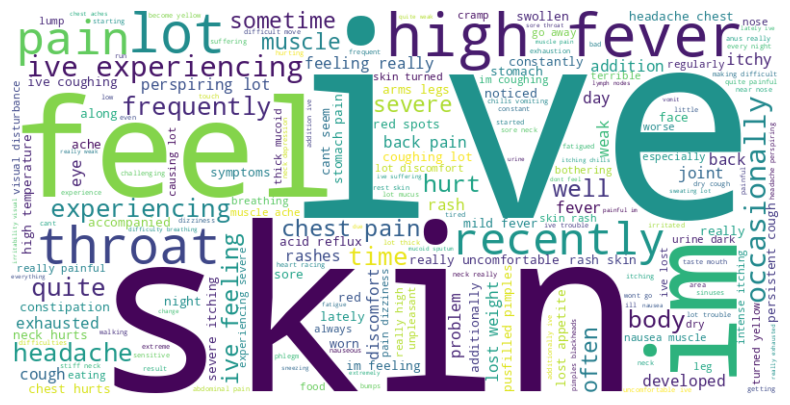

In [ ]:
# create word cloud to vizualize frequent words in our dataset
all_text = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# some custom symptoms generated by Chat GPT
cust_symptoms = {
    'Psoriasis': [" It is red, itchy, and covered in dry, scaly patches.", "My skin has been peeling, especially on my knees, elbows, and scalp."],
    'Varicose Veins': ["The veins in my legs are causing discomfort and difficulty sleeping at night. I have no idea why it is happening. I get cramps when I sprint.", "As I am overweight, I have noticed that my legs are swollen and the blood vessels are more visible than usual. The swelling seems to be getting worse over time."],
    'Typhoid': ["I've been having a lot of trouble sleeping because of the high fever, headache and chills. I wake up every day having a terrible pain in my belly area.", "I've been feeling exhausted and weak, and I can't seem to get rid of it. Because of the vomiting and nausea, I've entirely lost my appetite. My belly pains which are causing me concern."],
    'Chicken pox': ["The itching is making it hard for me to sleep at night. I can't get any rest. I have also lost my appetite and feel lethargic.", "I have a skin rash that's red and swollen, and it's spreading all over my body. I have a mild fever and it is causing me a lot of discomforts."],
    'Dengue': ["I am suffering from extreme fever and weakness. I have developed sores on my face. The sores itchy and uncomfortable. Often, a yellow colored ooze comes out of the sores.", "I noticed a skin rash on my face. It was made up of a blistering sore. Today I observed a yellow colored fluid coming out of the sores, I am not sure what it is."],
    'Impetigo': ["I have been feeling nauseous and have a constant urge to vomit. There is a strong pain behind my eyes and there are small red spots all over my arms.", "The high fever I have been experiencing is accompanied by sweating and weakness. My muscles pain as a result I cannot work all day. "],
    'Fungal infection': ["I have lots of itchy spots on my skin, and sometimes they turn red or bumpy. There are also some weird patches that are different colors than the rest of my skin, and sometimes I get these weird bumps that look like little balls.", "I have a lot of itching all over my skin, and sometimes it gets really red and bumpy. There are also some patches that are different colors than the rest of my skin, and sometimes I get these little bumps that look like little balls. It's really annoying and itchy."],
    'Common Cold': [" Along with the swelling in my lymph nodes, I've also been coughing up a lot of phlegm.", "My neck also feels puffy and swollen."],
    'Pneumonia': ["I'm sweating profusely and can't seem to get enough air. My throat is filled with a lot of mucus, and I don't feel good.", "I'm really tired, and my heart is beating really fast. I also have some brownish phlegm coming up"],
    'Dimorphic Hemorrhoids': ["I'm having a lot of trouble going to the bathroom and it's really painful when I do. My stool has been bloody and I've had some pain in my butt. My anus has been really itchy and irritated too.", "Lately I've been experiencing constipation and pain during bowel movements. My anus is really sore and it's been bleeding when I go. It's really painful and I'm really uncomfortable."],
    'Arthritis': ["I've been feeling truly frail in my muscles recently and my neck has been truly solid. Swollen joints make it difficult for me to move around. Walking has also been difficult.", "I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without feeling stiff. Walking has been really painful too."],
    'Acne': ["I woke up this morning to find a really nasty rash on my skin. There are a ton of blackheads and pimples that are filled with pus. My skin has also been really scurrying.", "A nasty rash has just appeared on my skin. Blackheads and pimples packed with pus are everywhere. Additionally, my skin has been extremely sensitive."],
    'Bronchial Asthma': [" must confess that I've been experiencing shortness of breath, a persistent cough, and a high fever. I've also been producing a lot of thick, mucoid sputum, and I'm feeling quite drained and exhausted. It's all been rather tough to deal with, and I'm feeling quite sick at the moment", "doctor, i have been having high fever since past few days , saliva also became thick , dry cough , weakness also seen"],
    'Hypertension': ["I've had intense aches in my chest, a headache that won't go away, and I've been feeling dizzy and unsteady.", "While taking a walk, I suddenly started experiencing headache, chest pain, and dizziness after feeling fine all day. Since then, it has been challenging for me to concentrate and focus."],
    'Migraine': ["Along with recurrent headaches and blurred vision, I suffer acid reflux and trouble digesting my food.", "Together with increased hunger, a sore neck, anxiety, irritation, and visual distortion, I've also been experiencing acid reflux, indigestion, frequent headaches, and impaired eyesight."],
    'Cervical spondylosis': ["Back pain, a hacking cough, and numbness in my arms and legs have been bothering me. In addition, my neck hurts, and I've having trouble staying balanced and without getting lightheaded.", "I have been experiencing severe back pain, a cough that comes and goes, and weakness in my limbs. My neck also hurts and I have been feeling dizzy and off balance."],
    'Jaundice': ["I've been itchy and throwing up. I've lost weight and am also really exhausted. My skin has become yellow and I have a severe temperature. My stomach has also been hurting.", "I have been suffering from itching, vomiting, and fatigue. I have also lost weight and have a high fever. My skin has turned yellow and my urine is dark. I have also been experiencing abdominal pain"],
    'Malaria': ["I've had a high temperature, vomiting, chills, and intense itching. I also have a headache and am perspiring a lot.", "I've been experiencing severe itching, chills, vomiting, and a high fever. In addition, I have a headache and am perspiring a lot. I've also been bothered by nausea and muscular ache."],
    'Urinary tract infection': ["I have pain in my abdomen, and often get feverish. I have sudden and strong urges to pee. The pain is almost constant, and often increases at night time. My pee almost always has a foul smell", "I have pain in my abdomen, and often get feverish. I have sudden and strong urges to pee. The pain is almost constant, and often increases at night time. My pee almost always has a foul smell"],
    'Allergy': ["I often sneeze and have a runny nose. My eyes are scratchy and frequently runny, and I frequently cough. My head hurts constantly.", "I get breathing issues and wheezing, which are asthma symptoms. I regularly have fevers and headaches. I constantly feel worn out."],
    'Gastroesophageal reflux disease': ["My throat frequently feels like it is burning, especially after eating. Additionally, I occasionally get a sour or bitter aftertaste, which causes me to feel queasy.", "I get a sour taste in my mouth all the time, even when there is nothing acidic in my stomach. I often get the hiccups and have a lump in my throat."],
    'Peptic ulcer disease': ["I'm losing hair, and my hair's texture has considerably altered. My dandruff is becoming worse, and my dry, itchy scalp. My skin is getting quite dry as well.", "My skin occasionally peels off the rashes that I have. This makes me more vulnerable to infections. My hands begin to shake, and occasionally I have tremors."],
    'Drug reaction': [" I've been losing weight, and I no longer like eating. I occasionally get bloody vomit and dark, tarry stools.", "I frequently have a lack of energy and appetite."],
    'Diabetes': ["My mouth and throat are dry. Additionally, I've been growing increasingly hungry.", "Particularly in the crevices of my skin, I have skin rashes and irritations."],
}

In [ ]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


In [ ]:
# use tfidf for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1500)

tfidf_train = tfidf_vectorizer.fit_transform(X_train).toarray()
tfidf_test = tfidf_vectorizer.transform(X_test).toarray()

In [ ]:
# knn will be our first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(tfidf_train, y_train)

KNeighborsClassifier()

In [ ]:
def report(y_test,predictions,model):
    """Function to create classification report"""
    model_name = ""
    if model==knn:
      model_name = "K-Nearest Neighbour Classifier"
    elif model==svm:
      model_name = "Support Vector Machine"
    elif model==rfc:
      model_name = "Random Forest Classifier"
    else:
      model_name = "Artificial Neural Network"
    print(model_name)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, predictions))
    # print(confusion_matrix(predictions,y_test))
    sns.heatmap(confusion_matrix(predictions,y_test), annot=True)
    x = classification_report(y_test, predictions,output_dict = True)
    macro_precision =  x['macro avg']['precision']
    macro_recall = x['macro avg']['recall']
    macro_f1 = x['macro avg']['f1-score']
    macro_accuracy = x['accuracy']
    print(macro_accuracy)
    my_map[model_name] = {macro_precision,macro_recall,macro_f1,macro_accuracy}
    print(my_map)


In [ ]:
predictions = knn.predict(tfidf_test)

K-Nearest Neighbour Classifier
Accuracy: 0.97
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.92      1.00      0.96        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.85      0.92      0.88        12
                    Common Cold       1.00      0.92      0.96        12
                         Dengue       0.79      0.92      0.85        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
    

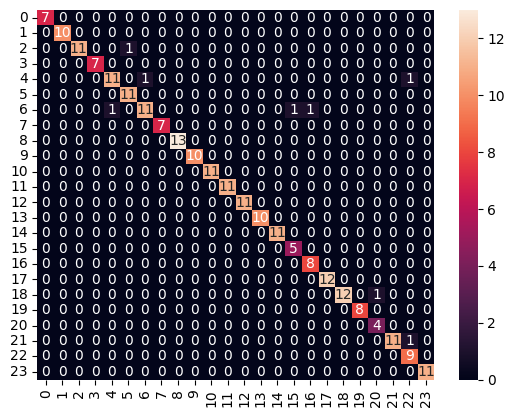

In [ ]:
report(y_test,predictions,knn)

In [ ]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = clean_text(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]

In [ ]:
symp1 = "Yellowing of skin and eyes, fatigue"

In [ ]:
symp2 = "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes."

In [ ]:
make_pred(knn,"Yellowing of skin and eyes, fatigue")

'Jaundice'

In [ ]:
make_pred(knn, "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes.")

'Dengue'

In [ ]:
def custom_test(model):
    global knn_correct
    global knn_incorrect
    global svm_correct
    global svm_incorrect
    global rfc_correct
    global rfc_incorrect
    c = 0
    correct_count = 0
    for dis,symptoms in cust_symptoms.items():
        for symptom in symptoms:
            c += 1
            pred = make_pred(model,symptom)
            correct = pred.lower()==dis.lower()
            if correct: correct_count += 1
            print("Actual: ",dis,"\t Pred: ",pred,"--",correct)
    incorrectCount = c - correct_count
    model_name = ""
    print("\nTotal: ",c,"\nCorrect: ",correct_count,"\nIncorrect Count:", c - correct_count)
    if model==knn:
      knn_correct = correct_count
      knn_incorrect = c - correct_count
      model_name = "K-Nearest Neighbour Classifier"
    elif model==svm:
      svm_correct = correct_count
      svm_incorrect = c - correct_count
      model_name = "Support Vector Machine"
    elif model==rfc:
      rfc_correct = correct_count
      rfc_incorrect = c - correct_count
      model_name = "Random Forest Classifier"
    labels = ['Correct', 'Incorrect']
    sizes = [correct_count , c - correct_count]

    # Create pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add title
    plt.title(model_name)


Actual:  Psoriasis 	 Pred:  Fungal infection -- False
Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrhoids -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic 

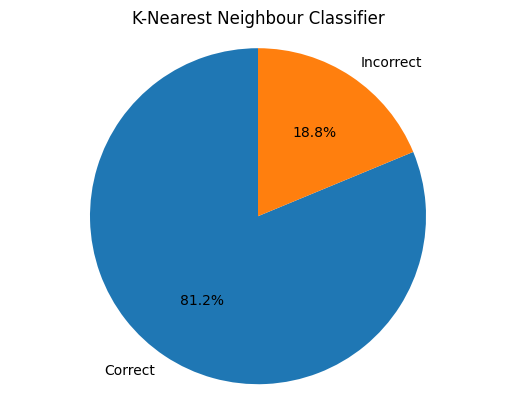

In [ ]:
custom_test(knn)

In [ ]:
svm = SVC(kernel = 'linear', C = 1).fit(tfidf_train, y_train)
svm_pred = svm.predict(tfidf_test)

In [ ]:
make_pred(svm,"Yellowing of skin and eyes, fatigue")

'allergy'

In [ ]:
make_pred(svm, "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes.")

'Dengue'

Support Vector Machine
Accuracy: 0.99
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.92      0.92      0.92        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
            

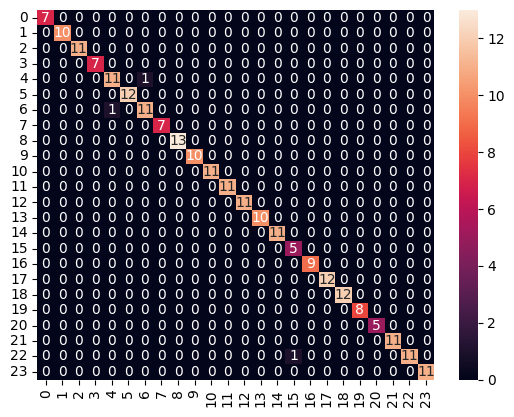

In [ ]:
report(y_test,svm_pred,svm)

Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrhoids -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrho

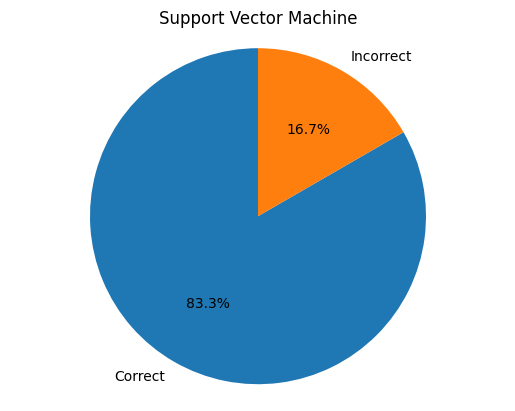

In [ ]:
custom_test(svm)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(tfidf_train,y_train)
rfc_pred = rfc.predict(tfidf_test)

Random Forest Classifier
Accuracy: 0.97
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.83      0.83      0.83        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       1.00      0.83      0.91        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       0.92      1.00      0.96        11
                       Jaundice       1.00      1.00      1.00        11
          

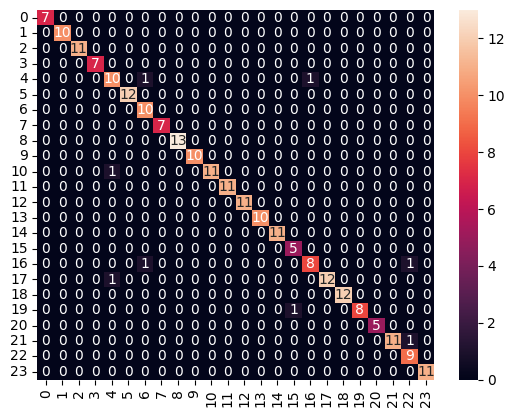

In [ ]:
report(y_test,rfc_pred,rfc)

In [ ]:
make_pred(rfc,"Yellowing of skin and eyes, fatigue")

'Psoriasis'

In [ ]:
make_pred(rfc, "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes.")

'Dengue'

Actual:  Psoriasis 	 Pred:  drug reaction -- False
Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Common Cold 	 Pred:  Pneumonia -- False
Actual:  Common Cold 	 Pred:  Arthritis -- False
Actual:  Pneumonia 	 Pred:  allergy -- False
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrhoids -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorr

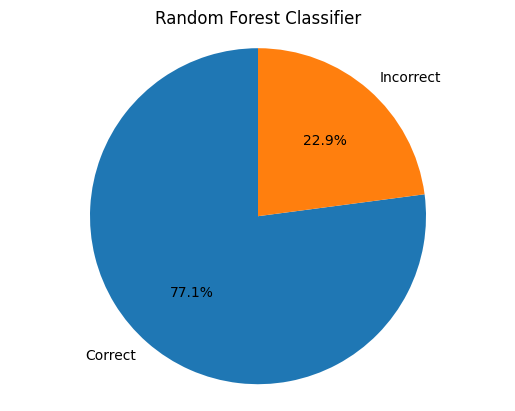

In [ ]:
custom_test(rfc)

In [ ]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
tfidf_train.shape

(960, 1404)

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, output_dim)


    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)

        return self.fc3(x)

In [ ]:
input_dim = tfidf_train.shape[1]
out_dim = 24

ann = ANN(input_dim,out_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001)

In [ ]:
diseases = df["label"].unique()

In [ ]:
idx2dis = {k:v for k,v in enumerate(diseases)}
dis2idx = {v:k for k,v in idx2dis.items()}

In [ ]:
y_train_int = y_train.apply(lambda x: dis2idx[x]).values
y_test_int = y_test.apply(lambda x: dis2idx[x]).values

In [ ]:
X_train_tensor = torch.tensor(tfidf_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_int)

X_test_tensor = torch.tensor(tfidf_test,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_int)

In [ ]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
epochs = 12
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        #print(inputs.shape,inputs.dtype)
        optimizer.zero_grad()
        outputs = ann(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

In [ ]:
pred_ann = ann(X_test_tensor).argmax(dim=1)

Artificial Neural Network
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       0.91      0.83      0.87        12
           4       1.00      1.00      1.00        11
           5       0.79      0.92      0.85        12
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       0.88      1.00      0.93         7
          16       1.00      1.00      1

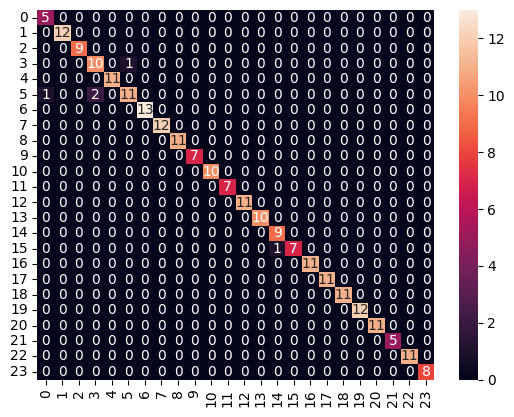

In [ ]:
report(y_test_int,pred_ann.detach().numpy(),ann)

In [ ]:
def custom_test2():
    global ann_correct
    global ann_incorrect
    c = 0
    correct_count = 0

    for dis,symptoms in cust_symptoms.items():
        for symptom in symptoms:
            c += 1
            symptom = clean_text(symptom)
            tfidf = tfidf_vectorizer.transform([symptom]).toarray()
            pred = ann(torch.tensor(tfidf,dtype=torch.float32))
            pred_txt = idx2dis[pred.argmax().item()]
            correct = pred_txt.lower()==dis.lower()
            if correct: correct_count += 1
            print("Actual: ",dis,"\t Pred: ",pred_txt,"--",correct)
    print("\nTotal: ",c,"\nCorrect: ",correct_count,"\nIncorrect Count : ", c - correct_count)
    ann_correct = correct_count
    ann_incorrect = c-correct_count
    labels = ['Correct', 'Incorrect']
    sizes = [correct_count , c - correct_count]
    ann_correct = correct_count
    ann_incorrect = c - correct_count
    print(ann_correct)
    print(ann_incorrect)

    # Create pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add title
    plt.title("Artificial Neural Network")

In [ ]:
text = clean_text(symp1)
tfidf = tfidf_vectorizer.transform([text]).toarray()
print(symp1)

Yellowing of skin and eyes, fatigue


In [ ]:
pred = ann(torch.tensor(tfidf,dtype=torch.float32))
idx2dis[pred.argmax().item()]

'Dengue'

In [ ]:
text = clean_text(symp2)
tfidf = tfidf_vectorizer.transform([text]).toarray()
print(symp2)

I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes.


In [ ]:
pred = ann(torch.tensor(tfidf,dtype=torch.float32))
idx2dis[pred.argmax().item()]

'Dengue'

Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Psoriasis 	 Pred:  Psoriasis -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Typhoid 	 Pred:  Typhoid -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Chicken pox 	 Pred:  Chicken pox -- True
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Dengue 	 Pred:  Impetigo -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Impetigo 	 Pred:  Dengue -- False
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Fungal infection 	 Pred:  Fungal infection -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Common Cold 	 Pred:  Common Cold -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Pneumonia 	 Pred:  Pneumonia -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrhoids -- True
Actual:  Dimorphic Hemorrhoids 	 Pred:  Dimorphic Hemorrho

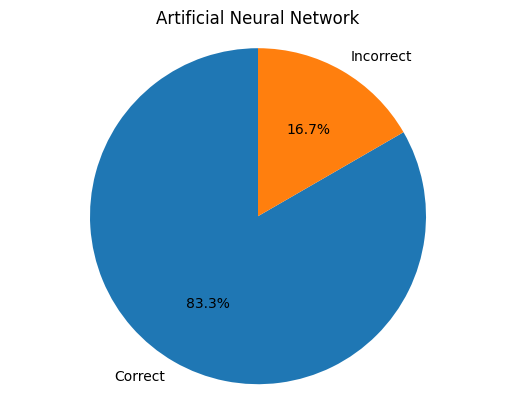

In [ ]:
custom_test2()

In [ ]:
words = df["text"].str.split().apply(len)
print("Average words: ",int(words.mean()))
print("Max words: ",int(words.max()))

Average words:  18
Max words:  31


In [ ]:
print(my_map)

{'K-Nearest Neighbour Classifier': {0.9745115995115995, 0.9621001683501683, 0.9666666666666667, 0.9664531388380494}, 'Support Vector Machine': {0.9895833333333334, 0.986111111111111, 0.9874560825647781, 0.9875}, 'Random Forest Classifier': {0.9699430199430199, 0.9669612794612795, 0.9669933484800897, 0.9666666666666667}, 'Artificial Neural Network': {0.9820752164502164, 0.9784722222222223, 0.9791666666666666, 0.9793963219592511}}


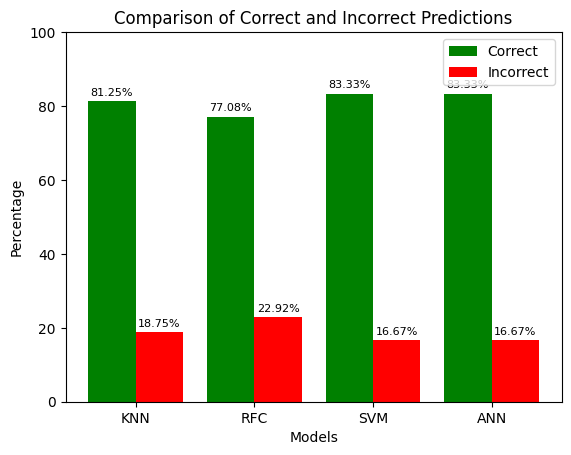

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
model_predictions = {
    'KNN': {'Correct': knn_correct*100/48, 'Incorrect': knn_incorrect*100/48},
    'RFC': {'Correct': rfc_correct*100/48, 'Incorrect': rfc_incorrect*100/48},
    'SVM': {'Correct': svm_correct*100/48, 'Incorrect': svm_incorrect*100/48},
    'ANN': {'Correct': ann_correct*100/48, 'Incorrect': ann_incorrect*100/48}
}

# Extract model names and prediction values
model_names = list(model_predictions.keys())
correct_values = [data['Correct'] for data in model_predictions.values()]
incorrect_values = [data['Incorrect'] for data in model_predictions.values()]

# Set up figure and axis
fig, ax = plt.subplots()

# Plot correct and incorrect bars side by side
bar_width = 0.4
index = np.arange(len(model_names))
ax.bar(index - bar_width/2, correct_values, width=bar_width, label='Correct', color='green')
ax.bar(index + bar_width/2, incorrect_values, width=bar_width, label='Incorrect', color='red')

# Add text annotations on top of each bar with up to two decimal places
for i, (correct, incorrect) in enumerate(zip(correct_values, incorrect_values)):
    ax.text(i - bar_width/2, correct + 1, f'{correct:.2f}%', ha='center', va='bottom', fontsize=8, color='black')
    ax.text(i + bar_width/2, incorrect + 1, f'{incorrect:.2f}%', ha='center', va='bottom', fontsize=8, color='black')

# Customize the plot
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Correct and Incorrect Predictions')
ax.legend()

ax.set_ylim(0, 100)

# Show the plot
plt.show()


{'K-Nearest Neighbour Classifier': {0.9745115995115995, 0.9621001683501683, 0.9666666666666667, 0.9664531388380494}, 'Support Vector Machine': {0.9895833333333334, 0.986111111111111, 0.9874560825647781, 0.9875}, 'Random Forest Classifier': {0.9699430199430199, 0.9669612794612795, 0.9669933484800897, 0.9666666666666667}, 'Artificial Neural Network': {0.9820752164502164, 0.9784722222222223, 0.9791666666666666, 0.9793963219592511}}


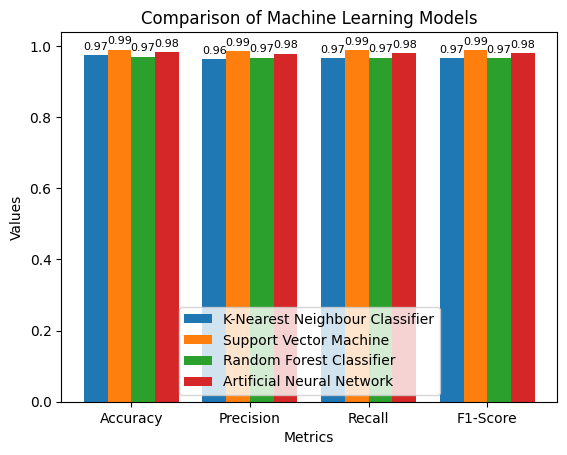

In [ ]:
print(my_map)
# Sample data (replace with your actual data)
model_metrics = my_map

# Extract metric names and values
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(model_metrics.keys())

# Set up figure and axis
fig, ax = plt.subplots()

# Plot each metric for each model
bar_width = 0.2
for i, (model, metrics) in enumerate(model_metrics.items()):
    x_values = np.arange(len(metric_names)) + i * bar_width
    ax.bar(x_values, metrics, width=bar_width, label=model)

    # Add text annotations on top of each bar
    for x, y in zip(x_values, metrics):
        ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=8)

# Customize the plot
ax.set_xticks(np.arange(len(metric_names)) + 0.5 * (len(model_metrics) - 1) * bar_width)
ax.set_xticklabels(metric_names)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Machine Learning Models')
ax.legend()

# Show the plot
plt.show()
